In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

warnings.filterwarnings('ignore')

Para leer correctamente el archivo .dat tendremos que seguir un procedimiento algo diferente que con ficheros .csv o .json.
No hay una cabecera con títulos, así que primero especificamos los campos que vemos que hay, que podemos deducir por lo que vemos en: https://github.com/BIDDL3/PRE-PROCESSING-DATA/blob/main/movies.dat 


# Ejercicio 2: Preprocesado, adecuación y preparación del dataset

In [2]:
mcabecera = ['movie_id', 'titulo', 'genero']
mcabecera

['movie_id', 'titulo', 'genero']

Para hacer correctamente la carga de los datos, hemos de especificar el tipo de codficación, que al parecer no es UTF-8 ya que da un error, sino ANSI (comprobado mediante Notepad++ en su sección "Encoding").

In [3]:
# Open the choosen file 
# (procedimiento modificado de: https://github.com/BIDDL3/PRE-PROCESSING-DATA/blob/main/01%20INTRODUCTION%20TO%20VARIABLES.ipynb)
movies = pd.read_table('movies.dat', sep = '::', header = None, names = mcabecera, encoding = 'ANSI')
# Nótese cómo especificamos el separador de dos doble puntos. para definir las columnas.
# También véasecómo añadimos la cabecera, y especificamos la codificación, ANSI.
movies.head()

,movie_id,titulo,genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Primero, hacemos un campo año (llamado "anho", a la portuguesa, para evitar el caracter "ñ"):

In [4]:
movies['anho'] = movies['titulo'].str.extract("(\(\d\d\d\d\))", expand=True)
# Incluimos en el patrón de regex el paréntesis: pueden existir películas que incluyen un año en el nombre. Ejemplo: "2001, una odiseo del espacio".
# https://stackoverflow.com/questions/60842297/pandas-extract-a-phrase-from-one-column-and-adding-it-to-a-new-column

In [5]:
movies  # Hemos conseguido extraer el año de cada película, pero con los paréntesis.

,movie_id,titulo,genero,anho
0,1,Toy Story (1995),Animation|Children's|Comedy,(1995)
1,2,Jumanji (1995),Adventure|Children's|Fantasy,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,4,Waiting to Exhale (1995),Comedy|Drama,(1995)
4,5,Father of the Bride Part II (1995),Comedy,(1995)
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,(2000)
3879,3949,Requiem for a Dream (2000),Drama,(2000)
3880,3950,Tigerland (2000),Drama,(2000)
3881,3951,Two Family House (2000),Drama,(2000)


In [6]:
movies.tail()

,movie_id,titulo,genero,anho
3878,3948,Meet the Parents (2000),Comedy,(2000)
3879,3949,Requiem for a Dream (2000),Drama,(2000)
3880,3950,Tigerland (2000),Drama,(2000)
3881,3951,Two Family House (2000),Drama,(2000)
3882,3952,"Contender, The (2000)",Drama|Thriller,(2000)


Hemos extraído los años como lo hemos hecho, incluyendo el paréntesis, para no llevarnos valores que no corresponde y que realmente forman parte de un título (un conocido ejemplo: 2001, Odisea en el Espacio). Pero ahora conviene eliminar el paréntesis. Podríamos por ejemplo hacerlo mediante un replace, o volviendo a aplicar un "extract", sobreescribiendo.

Quitamos el año y el paréntesis del campo "titulo". En base al comentario recién recibido sobre que no he usado explícitamente los procedimientos del paquete "re" de expresiones regulares: hagámoslo ahora, por variar de procedimiento.

In [7]:
len(movies['titulo'])

3883

In [8]:
# Con lo siguiente, quedará sobreescrita la columna del año, eliminando el paréntesis:
movies['anho'] = movies['anho'].str.extract("(\d\d\d\d)", expand=True)

In [9]:
movies

,movie_id,titulo,genero,anho
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


Ahora hemos de eliminar el año del final de cada título.

In [10]:
movies['titulo'] = movies['titulo'].str.replace('\s\(\d{4}\)$', '', regex=True)

In [11]:
movies

,movie_id,titulo,genero,anho
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [12]:
movies.anho.unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', '1971', '1979',
       '1966', '1978', '1985', '1983', '1984', '1931', '1922', '1927',
       '1929', '1928', '1925', '1923', '1999', '1919', '2000', '1920',
       '1921'], dtype=object)

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   titulo    3883 non-null   object
 2   genero    3883 non-null   object
 3   anho      3883 non-null   object
dtypes: int64(1), object(3)
memory usage: 121.5+ KB


In [14]:
movies.shape

(3883, 4)

Vemos que tenemos 3883 líneas.

Los campos habiendo aplicado como separadores "::" y habiendo añadido el campo "anho" son: un identificador asignado por la base de datos, el título (que incluye el año, que de hecho hemos extraído a otro campo), y el género de película, que de hecho puede ser más de uno.

Conviene hacer una operación más: separar en sus trozos los campos de la columna género que son varios géneros a la vez. Este tratamiento se hace justamente en el mismo proyecto de GitHub de donde se han obtenido los datos. Lo aprovechamos.

In [15]:
movies.describe

<bound method NDFrame.describe of       movie_id                       titulo                        genero  \
0            1                    Toy Story   Animation|Children's|Comedy   
1            2                      Jumanji  Adventure|Children's|Fantasy   
2            3             Grumpier Old Men                Comedy|Romance   
3            4            Waiting to Exhale                  Comedy|Drama   
4            5  Father of the Bride Part II                        Comedy   
...        ...                          ...                           ...   
3878      3948             Meet the Parents                        Comedy   
3879      3949          Requiem for a Dream                         Drama   
3880      3950                    Tigerland                         Drama   
3881      3951             Two Family House                         Drama   
3882      3952               Contender, The                Drama|Thriller   

      anho  
0     1995  
1     1995  
2 

In [16]:
movies.tail()

,movie_id,titulo,genero,anho
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000
3882,3952,"Contender, The",Drama|Thriller,2000


Otra cosa que se nos pide es quedarnos solo con el primer género de cada registro. Lo hacemos como sigue:

In [17]:
movies['genero'] = movies['genero'].str.split('|').str[0]

In [18]:
movies

,movie_id,titulo,genero,anho
0,1,Toy Story,Animation,1995
1,2,Jumanji,Adventure,1995
2,3,Grumpier Old Men,Comedy,1995
3,4,Waiting to Exhale,Comedy,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


Con esto, damos por concluida la limpieza/preprocesado de los datos.

# Ejercicio 3 

Representar algunas cosas relevantes del dataset. A priori, veremos cuán fácil o difícil me resulta, me llama la atención representar lo siguiente:
    
* Evolución del número de películas, por año. Un diagrama de líneas sería a priori adecuado.
* Géneros más frecuentes. Un barplot serviría.
* Evolución de los géneros más frecuentes.
* Palabra "larga" (cuatro caracteres o más) más frecuente en los títulos. Un "pie chart" de las palabras "top" podría ser ok.

Empecemos por el número de películas por año. Lo apropiado a priori me parece un diagrama de líneas, que transmite bien en general las evoluciones temporales.

In [19]:
movies.head(10)

,movie_id,titulo,genero,anho
0,1,Toy Story,Animation,1995
1,2,Jumanji,Adventure,1995
2,3,Grumpier Old Men,Comedy,1995
3,4,Waiting to Exhale,Comedy,1995
4,5,Father of the Bride Part II,Comedy,1995
5,6,Heat,Action,1995
6,7,Sabrina,Comedy,1995
7,8,Tom and Huck,Adventure,1995
8,9,Sudden Death,Action,1995
9,10,GoldenEye,Action,1995


In [20]:
movies['titulo'].groupby(movies.anho).agg('count')

#movies.count()

anho
1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: titulo, Length: 81, dtype: int64

In [21]:
type(movies['titulo'].groupby(movies.anho).agg('count'))

pandas.core.series.Series

In [22]:
pelis_anhos = movies['titulo'].groupby(movies.anho).agg('count')

In [23]:
pelis_anhos

anho
1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: titulo, Length: 81, dtype: int64

In [24]:
sorted(list(movies.anho.unique()))

['1919',
 '1920',
 '1921',
 '1922',
 '1923',
 '1925',
 '1926',
 '1927',
 '1928',
 '1929',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000']

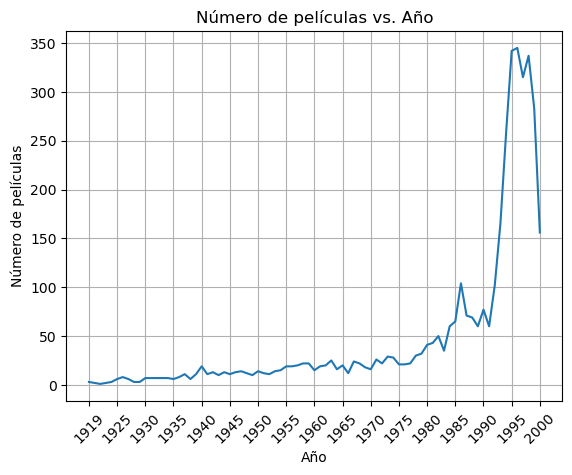

In [25]:
#Obtenemos dos listas ordenadas en función del año. Primero creamos dos listas vacías:
anhos = []  # Años
num_pelis = []  # Número de películas
# Luego las rellenamos, por orden ascendente de año:
for year in sorted(movies.anho.unique()):  # Me he vuelto loco usando "sort" en lugar de "sorted" (nota para mí mismo).
    anhos.append(year)
    num_pelis.append(pelis_anhos[year])  # Accedemos con el año al número de películas que habíamos almacenado antes.

# Representamos
fig, ax = plt.subplots()
ax.plot(anhos, num_pelis)

ax.set(xlabel='Año', ylabel='Número de películas',
       title='Número de películas vs. Año')

# Mostrar solo un "label" por cada cinco "ticks" (si no, se solapan y no se lee)
ticks = []
espacio_ticks = 5
for i, year in enumerate(anhos):
    if i % espacio_ticks == 0:  # Cuando el modulo de dividir entre cinco (el espacio deseado).
        ticks.append(year)
ax.set_xticks(ticks)  # Sin especificar esto, los ticks no aparecían...
# Lo anterior es una "nota para mí mismo", a partir de ahora, y en adelante "NPM", acrónimo de "No Puedo Más".

ax.grid()

# Rotación de "ticks"
plt.xticks(rotation=45)

#fig.savefig("test.png")
plt.show()

De la representación, podemos ver que hay un paulatino incremento en el número de películas desde los años veinte hasta los setenta. Luego, a mediados de los setenta hay un incremento relativamente importante, haciendo de los ochenta una época notablemente más prolífica que todas las anteriores.

La tendencia continuó, con un bache entre 1985 y 1990, seguido de un "boom" descomunal en el número de películas, al menos en cuanto a las películas que aparecen en la base de datos. Es una pequeña muestra, "of course". Pero puede reflejar tendencias de "el todo".

Veamos ahora cuáles son los géneros más frecuentes. Para eso hemos de hacer un "count" de la columna movies.genero, y a partir de ahí, representar -por ejemplo- un barplot.

In [26]:
movies.genero.groupby(movies.genero).count()

genero
Action          503
Adventure       155
Animation        90
Children's       89
Comedy         1024
Crime           131
Documentary     123
Drama          1176
Fantasy           2
Film-Noir        25
Horror          262
Musical          25
Mystery          36
Romance          50
Sci-Fi           46
Thriller        101
War              12
Western          33
Name: genero, dtype: int64

In [27]:
type(movies.genero.groupby(movies.genero).count())

pandas.core.series.Series

In [28]:
movies.genero.groupby(movies.genero).count()['Action']

503

In [29]:
movies.genero.groupby(movies.genero).count().keys()

Index(['Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object', name='genero')

Representemos los géneros visualmente, mediante un diagrama de barras.

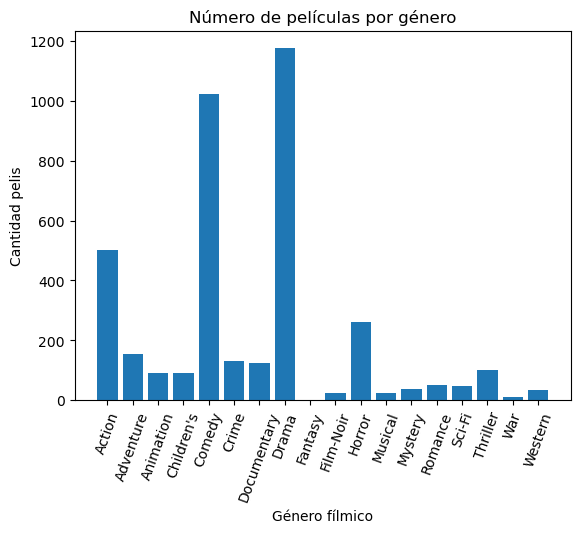

In [30]:

nombre_genero = movies.genero.groupby(movies.genero).count().keys()  # El "count" para acceder a sus elementos se comporta como un diccionario.
numeros_genero = movies.genero.groupby(movies.genero).count()  # El "count" para acceder a sus elementos se comporta como un diccionario.

fig, ax = plt.subplots()
ax.bar(nombre_genero, numeros_genero)

ax.set_xlabel('Género fílmico')
ax.set_ylabel('Cantidad pelis')
ax.set_title('Número de películas por género')
# ax.legend(title='Número de películas por género')   # Esto es por si se pone leyenda.

plt.xticks(rotation=70)

plt.show()

De observar el gráfico, podemos ver que en la base de datos en cuestión, con gran diferencia dominan los géneros de acción, comedia y drama, seguidos de las películas de miedo (Horror), y ya algo más lejos, las películas de aventura ("Adventure").

De esto podemos pensar en una nueva representación. ¿Cómo han evolucionado los 3 géneros más importantes a lo largo del tiempo?

In [31]:
# Con lo siguiente, agrupamos por género.
# Además contamos cuántas pelis hoy por género, ordenamos de mayor a menor, y nos quedamos con las cuatro más abundantes.
top4_generos = (movies.genero.groupby(movies.genero).count()).sort_values(ascending = False).keys()[0:4]
print((movies.genero.groupby(movies.genero).count()).sort_values(ascending = False).keys()[0:4])

Index(['Drama', 'Comedy', 'Action', 'Horror'], dtype='object', name='genero')


In [34]:
movies

,movie_id,titulo,genero,anho
0,1,Toy Story,Animation,1995
1,2,Jumanji,Adventure,1995
2,3,Grumpier Old Men,Comedy,1995
3,4,Waiting to Exhale,Comedy,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


¿Cómo obtenemos el número de películas de un género concreto, p.ej. 'Drama', en cada año concreto?

In [35]:
(movies.genero.groupby([movies.genero, movies.anho]).count()).sort_index(ascending = True)['Drama']

anho
1922      1
1923      1
1925      3
1926      3
1927      4
       ... 
1996    118
1997    100
1998    116
1999    103
2000     36
Name: genero, Length: 76, dtype: int64

In [36]:
drama = (movies.genero.groupby([movies.genero, movies.anho]).count()).sort_index(ascending = True)['Drama']  # Ordenamos por índice.

In [37]:
drama.head()

anho
1922    1
1923    1
1925    3
1926    3
1927    4
Name: genero, dtype: int64

Pues bien, hacemos lo mismo para los otros tres géneros del "top 4": "Drama", "Comedy", "Action" y "Horror":

In [39]:
comedia = (movies.genero.groupby([movies.genero, movies.anho]).count()).sort_index(ascending = True)['Comedy']
accion = (movies.genero.groupby([movies.genero, movies.anho]).count()).sort_index(ascending = True)['Action']
horror = (movies.genero.groupby([movies.genero, movies.anho]).count()).sort_index(ascending = True)['Horror']

In [ ]:
# BORRAR????
comedia = movies[movies.sort_values(by='anho').genero == 'Comedy'].groupby('anho').count()['genero']
accion = movies[movies.sort_values(by='anho').genero == 'Action'].groupby('anho').count()['genero']
horror = movies[movies.sort_values(by='anho').genero == 'Horror'].groupby('anho').count()['genero']

Pero ojo, queda otra cuestión que atender. No cada género tiene películas en todos los años. Si no incluimos los años que faltan, así como un valor cero para esos años, la representación "hará cosas raras". Para prevenirlo, hemos de completar la serie que genera el código anterior con los años que faltan, asociados al valor cero (o a un NaN).

In [40]:
# Step 1: Create a complete range of years
full_year_range = range(1915, 2000 + 1)

# Si no se convierten los índices a enteros, luego pasan cosas raras y anula todos los valores a cero.
drama.index = drama.index.astype(int)
comedia.index = comedia.index.astype(int)
accion.index = accion.index.astype(int)
horror.index = horror.index.astype(int)

# "Reindizar" la serie, añadiendo todos los valores de año que faltan, y poniendo ceros en los años añadidos.
drama = drama.reindex(full_year_range).fillna(0)
comedia = comedia.reindex(full_year_range).fillna(0)
accion = accion.reindex(full_year_range).fillna(0)
horror = horror.reindex(full_year_range).fillna(0)

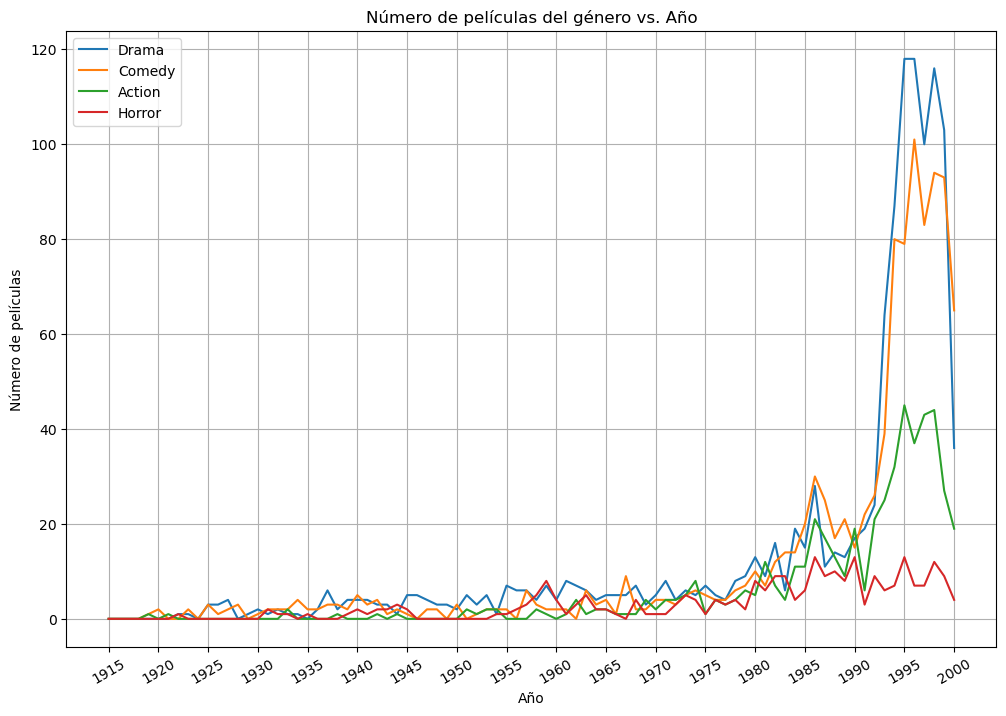

In [43]:
# Creación del "lienzo".
fig, ax = plt.subplots(figsize=(12, 8))  # Aquí podemos modificar el tamaño, en pulgadas

# Representar cada serie de pandas. Si faltan años, hará cosas raras, por eso hemos rellenado antes los años que faltaban.
ax.plot(drama.index, drama.values, label='Drama')
ax.plot(comedia.index, comedia.values, label='Comedy')
ax.plot(accion.index, accion.values, label='Action')
ax.plot(horror.index, horror.values, label='Horror')

# Setting the labels and title
ax.set(xlabel='Año', ylabel='Número de películas', title='Número de películas del género vs. Año')

# Espaciado de los "ticks" a uno cada cinco años
tick_spacing = 5
ticks = [year for i, year in enumerate(drama.index) if i % tick_spacing == 0]  # Nos basamos en la operación "modulo" y eñ rango de años.
ax.set_xticks(ticks)

# Orientación de los "ticks"
plt.xticks(rotation=30)

# Que aparezca la leyenda
ax.legend()

# Mostrar el "grid"
ax.grid()

# Show the plot
plt.show()

En este gráfico podemos ver que los cuatro géneros más populares, aunque ha ido habiendo "pequeñas victorias" puntuales de alguno de ellos, la mayor parte del tiempo parecen seguir a lo largo del tiempo la tendencia de que domina el Drama, luego la comedia, luego la acción y luego las películas de miedo, lo cual tiene bastante sentido si consideramos el orden del "top 4".

Con excepción de algunos momentos en la primera mitad del siglo XX, la desviación más relevante de este orden de cosas se vio (según nuestra base de datos) en la segunda mitad de los ochenta y primeros noventa, en que la comedia le arrebató por unos cuantos años el "trono" al drama. Ni las películas de miedo ni las de acción lograron disputar esa preponderancia al Drama ni a la Comedia, solo muy puntualmente las películas de miedo o de acción fueron las más frecuentes en un año.